In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from random import randrange, uniform
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/8_urls.csv')
df.describe()
print((df['status'] == 0).sum())
print((df['status'] == 1).sum())
df = df.drop(columns=['url'])
df = df.dropna(subset=['domain_tld'])
df = pd.get_dummies(df, columns=["protocol", "www", "is_subdir"], drop_first=False)
df.describe()

4151
9729


,length,digits,dots,hyphens,slashes,commas,tlides,qms,ands,eqs,...,domain_special,domain_tld,domain_ratio,forms,iframes,missing_title,title_length,words,favicon,status
count,13878.000000,13878.000000,13878.000000,13878.000000,13878.000000,13878.000000,13878.000000,13878.000000,13878.000000,13878.000000,...,13878.000000,13878.000000,13878.000000,13878.000000,13878.000000,13878.000000,13878.000000,13878.000000,13878.000000,13878.000000
mean,59.499424,5.343782,2.262358,0.877504,3.599294,0.009511,0.001297,0.053538,0.036821,0.134097,...,2.460801,2.388312,1.997943,0.857760,0.350122,0.031993,4.294711,5.399841,0.665081,0.700894
std,66.100304,14.096699,1.132555,2.160854,1.292566,0.336866,0.041567,0.255405,0.519018,2.107089,...,0.980394,3.256408,4.831048,2.031233,1.139659,0.175988,3.740951,2.736781,0.471979,0.457883
min,13.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,33.000000,0.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000
50%,51.000000,2.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,3.000000,5.000000,1.000000,1.000000
75%,84.000000,8.000000,3.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,2.000000,0.820000,1.000000,1.000000,0.000000,5.000000,6.000000,1.000000,1.000000
max,3441.000000,772.000000,40.000000,88.000000,42.000000,20.000000,3.000000,8.000000,30.000000,131.000000,...,9.000000,18.000000,54.000000,120.000000,59.000000,1.000000,99.000000,40.000000,1.000000,1.000000


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 13878 entries, 0 to 13879
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   length          13878 non-null  float64
 1   digits          13878 non-null  float64
 2   dots            13878 non-null  float64
 3   hyphens         13878 non-null  float64
 4   slashes         13878 non-null  float64
 5   commas          13878 non-null  float64
 6   tlides          13878 non-null  float64
 7   qms             13878 non-null  float64
 8   ands            13878 non-null  float64
 9   eqs             13878 non-null  float64
 10  underscores     13878 non-null  float64
 11  percentages     13878 non-null  float64
 12  specials        13878 non-null  float64
 13  ratio           13878 non-null  float64
 14  domain_length   13878 non-null  float64
 15  domain_digits   13878 non-null  float64
 16  domain_dots     13878 non-null  float64
 17  domain_hyphens 

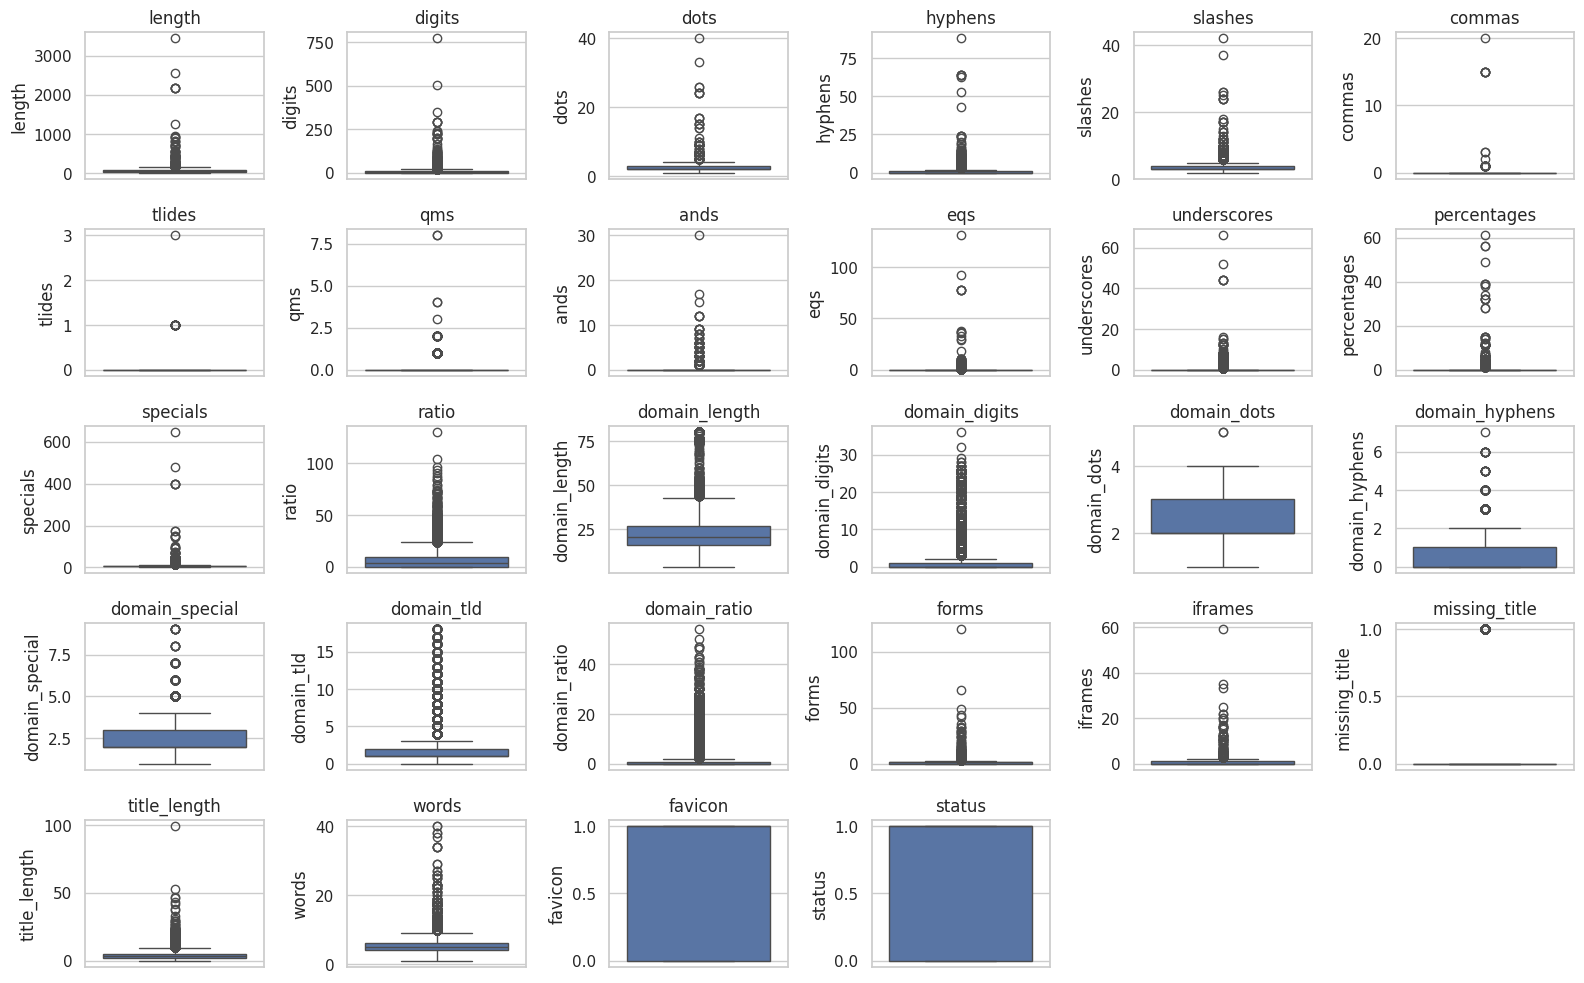


Number of outliers detected: 4572
Rows remaining after outlier removal: 10573
Outliers have been handled using IQR capping.

tlides - Unique Values:
tlides
0.0    13878
Name: count, dtype: int64

qms - Unique Values:
qms
0.0    13878
Name: count, dtype: int64

ands - Unique Values:
ands
0.0    13878
Name: count, dtype: int64

eqs - Unique Values:
eqs
0.0    13878
Name: count, dtype: int64

underscores - Unique Values:
underscores
0.0    13878
Name: count, dtype: int64

specials - Unique Values:
specials
7.0     3226
8.0     3102
6.0     2891
9.0     1432
5.0      955
13.5     642
10.0     612
11.0     448
12.0     251
13.0     208
4.0      111
Name: count, dtype: int64

Summary Statistics for Domain Columns:
       domain_length  domain_digits  domain_dots  domain_hyphens  \
count   13878.000000   13878.000000  13878.00000    13878.000000   
mean       23.202515       0.612300      2.02522        0.421819   
std        10.559307       1.043851      0.70487        0.609382   
min      

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy import stats

# Set visualization styles
sns.set(style="whitegrid")

# 1. Load the Dataset
# Replace 'your_dataset.csv' with the correct path to your dataset
# df = pd.read_csv('your_dataset.csv')

# Display basic info and check for null values
print("Dataset Information:")
print(df.info())

print("\nFirst 5 rows of the dataset:")
print(df.head())

print("\nMissing Values in Dataset:")
print(df.isnull().sum())

# ============================
# 2. Handling Missing Values
# ============================

# a) Columns with Missing Values
missing_cols = df.columns[df.isnull().any()]
print(f"\nColumns with missing values: {missing_cols.tolist()}")

# b) Impute missing values
# Numeric Columns: Fill with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
imputer_num = SimpleImputer(strategy='median')
df[num_cols] = imputer_num.fit_transform(df[num_cols])

# Categorical Columns: Fill with most frequent
cat_cols = df.select_dtypes(include=['object']).columns
if cat_cols.size > 0:
    # If categorical columns exist, proceed with imputation
    imputer_cat = SimpleImputer(strategy='most_frequent')
    df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])
else:
    # If no categorical columns found, print a message
    print("No categorical columns found in the dataset for imputation.")

print("\nMissing Values After Imputation:")
print(df.isnull().sum())

print("\nMissing Values After Imputation:")
print(df.isnull().sum())

# ============================
# 3. Detecting and Handling Outliers
# ============================

# Visualize outliers using boxplots
print("\nVisualizing Outliers:")
plt.figure(figsize=(16, 10))
for i, col in enumerate(num_cols):
    plt.subplot(5, 6, i+1)  # Adjust rows/columns based on number of features
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Removing outliers using Z-Score method
z_scores = np.abs(stats.zscore(df[num_cols]))
threshold = 3  # Z-score threshold
outlier_indices = np.where(z_scores > threshold)
print(f"\nNumber of outliers detected: {len(outlier_indices[0])}")

# Option 1: Remove rows with outliers
df_clean = df[(z_scores < threshold).all(axis=1)]
print(f"Rows remaining after outlier removal: {df_clean.shape[0]}")

# Option 2: Alternatively, cap outliers using IQR
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])

print("Outliers have been handled using IQR capping.")

# ============================
# 4. Feature-Specific Cleaning
# ============================

# a) Verify 'special' features that might indicate improper encoding
special_features = ['tlides', 'qms', 'ands', 'eqs', 'underscores', 'specials']
for feature in special_features:
    print(f"\n{feature} - Unique Values:")
    print(df[feature].value_counts())

# b) Domain-based columns
domain_cols = ['domain_length', 'domain_digits', 'domain_dots',
               'domain_hyphens', 'domain_special', 'domain_ratio']
print("\nSummary Statistics for Domain Columns:")
print(df[domain_cols].describe())

# c) Verify 'protocol' columns
protocol_cols = ['protocol_1', 'protocol_2']
print("\nProtocol Columns Summary:")
for col in protocol_cols:
    print(f"{col}: {df[col].value_counts()}")

# ============================
# 5. Final Dataset Overview
# ============================

print("\nFinal Dataset Shape:", df.shape)
print("\nFinal Dataset Info:")
print(df.info())

print("\nFirst 5 rows of the cleaned dataset:")
print(df.head())

# Save the cleaned dataset
df.to_csv('preprocessed_dataset.csv', index=False)
print("\nPreprocessed dataset saved as 'preprocessed_dataset.csv'.")
